# INFO8010: Homework 1
In this first homework you will familiarize yourself with the basics of differentiable programming with PyTorch. At the end of this assignment you should be able to build and train your own multi-layer perceptron! Although this assignment is optional, we **strongly** advise you to do it. At the end of the course we expect that you will be comfortable with PyTorch, which you will in turn also use for your final project.

## 0. Prerequisite

Before diving into the ***wonderful world of Deep Learning*** you need to install some libraries. 
If you are reading these instructions, it means that you already have the Jupyter-Notebook running, which is a good start since you will have to use it for both assignments. 

In order to successfully run all the cells, you will need some libraries installed on your machine. Together with this assignment you are also given a `.pdf` and a `.yml` file which will guide you through the installation process. Please read the instructions carefully before starting this homework.

If you happen to not be familiar with Jupyter we refer you to this straightforward [tutorial](https://realpython.com/jupyter-notebook-introduction/) which should help you in getting started.

You will notice that the assignemnt comes in different flavours: sometimes you will be provided with already running code, which comes with appropriate explanations. Other times you will have to write code yourself, when this is the case the cells of the notebook will be marked in red with the following instruction <span style="color:red; font-style: italic">Your code comes below</span>. Sometimes, next to writing code yourself you will also have to motivate why you programmed certain things or guide us quickly through the results that you obtained. If this is required you will see the following green instruction: <span style="color:green; font-style:italic">Your discussion comes below</span>. 

Please note that you will **not** have to handle in any sort of written report by the end of the assignment. We do however expect **the notebook** with the solutions to the exercises.

Now that you have survived the boring part you are ready to start this first assignment!
Our first step is very easy, we just start with importing some appropriate libraries.

In [1]:
import torch
import numpy
import matplotlib.pyplot as plt

## 1. Tensors and basic operations

Tensors are one of the main ingredients when it comes to modern Deep-Learning frameworks. Almost all deep learning computations can be expressed as tensor operations which make computation fast and efficient. We will now see how to manipulate tensors within the PyTorch library.

### 1.1 A guided tour

**What is a tensor?** There are many valid answers but to keep it simple you can see them as multidimensional arrays. 

Wikipedia says: *'A tensor may be represented as a (potentially multidimensional) array. Just as a vector in an n-dimensional space is represented by a one-dimensional array with n components with respect to a given basis, any tensor with respect to a basis is represented by a multidimensional array.'*

*In PyTorch, a tensor is an object from the class torch.Tensor (or torch.Tensor).*
This class handles almost any operations you could like to perform on a tensor, see below.

There are many ways to create tensors, here below are two examples (for further information you can check the [library](https://pytorch.org/docs/stable/tensors.html#:~:text=To%20create%20a%20tensor%20with,ops%20(see%20Creation%20Ops) \).

In [2]:
# We can create a tensor from an array:
t1 = torch.tensor([[1, 2], [7, 9]])
# Or we can also create a 2x2 tensor filled with zeros:
t2 = torch.zeros(2, 2)

If you want to check how a tensor looks like you can easily print it:

In [3]:
print(t1)
print(t2)

tensor([[1, 2],
        [7, 9]])
tensor([[0., 0.],
        [0., 0.]])


*As an array may contain different types of data (e.g: string, float, int, boolean), so can a tensor (although it is restricted to numerical types only).*

Let's check what type of data is in t1 and t2:

In [4]:
print(t1.type(), t2.type())

torch.LongTensor torch.FloatTensor


The type `LongTensor` is used to store integer values and `FloatTensor` for real values. You can also convert tensors from one type to another:

In [5]:
t1_real = t1.float()
print(t1, t1.type(), t1_real, t1_real.type())
t2_int = t2.long()
print(t2, t2.type(), t2_int, t2_int.type())

tensor([[1, 2],
        [7, 9]]) torch.LongTensor tensor([[1., 2.],
        [7., 9.]]) torch.FloatTensor
tensor([[0., 0.],
        [0., 0.]]) torch.FloatTensor tensor([[0, 0],
        [0, 0]]) torch.LongTensor


*Another important property of a tensor is its shape, you can use the `.shape` property or `.size()` method to check the dimension of a tensor.* 

Both return a `torch.Size` object that can be manipulated with its own operations. Most of the time you will just use torch.Size objects as a list (e.g. to check the size of a tensor along one of its dimension).

In [6]:
print(t1.shape, t1.size())
# if we want to check for the length of the tensor along its first dimension:
print(t1.shape[0])

torch.Size([2, 2]) torch.Size([2, 2])
2


**1D (vectors) and 2D (matrices) tensors**

Let us now familiarize ourselves with some simple tensor operations. If you are familiar with the numpy library this will look alike, similarly if you know about matlab this should also remind you of what you can do with this language. If none of the above, you might be reconsidering your life choices!

In [7]:
# Let's create 2 1D tensors of 5 random integers:
v1 = torch.randint(low=-100, high=100, size=[5])
v2 = torch.randint(low=-100, high=100, size=[5])
v1, v2

(tensor([-25,  98, -93,  43,  84]), tensor([-58, -43,  41,  15,   6]))

Let's review some basic operations:

In [8]:
# addition
v_sum = v1 + v2
print(v_sum)

tensor([-83,  55, -52,  58,  90])


Subtraction (-), element-wise multiplication (*) and element-wise division follow the same logic.

<span style="color:red; font-style:italic">Your code comes below</span>

In [9]:
# Subtract v1 from v2
v_sub = v2 - v1
print(v_sub)

# Multiply the elements of v1 and v2
v_mul = v1 * v2
print(v_mul)

# Divide the elements of v1 by v2
v_div = torch.true_divide(v1,v2)
print(v_div)

tensor([ -33, -141,  134,  -28,  -78])
tensor([ 1450, -4214, -3813,   645,   504])
tensor([ 0.4310, -2.2791, -2.2683,  2.8667, 14.0000])


Sometimes you would like to extract a subvector from the tensor, we call this operation *slicing* and it is as simple as this: 

In [10]:
# Slicing: extract sub-Tensor [from:to)
print(v_sum[0:3])

tensor([-83,  55, -52])


You may also extract specific elements:

In [11]:
# Retrieving first, fourth and fifth elements
print(v_sum[[0, 3, 4]])

tensor([-83,  58,  90])


Within deep learning, the fun really starts when the dimensionality of the tensors increases. So let's have a look at matrices.
Let's create two of them, again there are many ways of instanciating matrices -> Google is your friend whenever you look for [one of them](https://letmegooglethat.com/?q=Instantiate+matrix+in+pytorch).

In [12]:
# The first matrix will be a 5x 10 matrix full of normally distributed random values:
m1 = torch.randn(5, 10)

# The second is the 10x10 identity matrix:
m2 = torch.eye(10)

m1, m2

(tensor([[ 0.1836, -0.3780, -0.0698, -0.1255, -0.6282, -0.5143,  2.4809,  2.1231,
          -0.3426, -0.6110],
         [-0.5496, -0.2087, -0.0707, -0.6983, -0.1347, -0.0085,  0.6973,  1.0360,
          -0.5509,  0.5193],
         [-0.8082, -0.0094,  0.0775,  2.6968,  0.9323,  0.6565, -0.2110,  0.6875,
          -0.1461, -0.8034],
         [-1.6358,  0.8908,  0.3505,  1.0535,  1.1326,  0.8762, -0.1212,  0.8368,
          -2.1877, -0.1165],
         [ 0.4443, -0.4350, -1.1935, -1.6491, -0.9199,  0.0243,  0.3168, -1.0287,
           1.1939, -1.3371]]),
 tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0

**Slicing**

Slicing in matrices (or any tensors) can be performed thanks to `:`, negative numbers count from the end. Feel free to play with this operator and to vizualize the results in order to be sure to understand what is slicing.

In [13]:
m1[:4, 2:-1]

tensor([[-0.0698, -0.1255, -0.6282, -0.5143,  2.4809,  2.1231, -0.3426],
        [-0.0707, -0.6983, -0.1347, -0.0085,  0.6973,  1.0360, -0.5509],
        [ 0.0775,  2.6968,  0.9323,  0.6565, -0.2110,  0.6875, -0.1461],
        [ 0.3505,  1.0535,  1.1326,  0.8762, -0.1212,  0.8368, -2.1877]])

**Squeeze and Unsqueeze**

Squeezing removes one dimension from the vector, on the opposite unsqueeze add a dimension.

In [14]:
print('Before unsqueeze: ', m1.shape)
m1 = m1.unsqueeze(0)
print('After unsqueeze: ', m1.shape)
m1 = m1.squeeze(0)
print('After squeeze: ', m1.shape)

Before unsqueeze:  torch.Size([5, 10])
After unsqueeze:  torch.Size([1, 5, 10])
After squeeze:  torch.Size([5, 10])


**Expand**

Expand will reproduce the tensor along the expanded dimensions, see the [docs](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.expand).
For example if we want to create a 4x6 matrix where each column is a vector of integer that goes from 1 to 6 we could do the following:

In [15]:
v = torch.arange(1, 7)
m_v = v.unsqueeze(1).expand(-1, 4)
m_v

tensor([[1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3],
        [4, 4, 4, 4],
        [5, 5, 5, 5],
        [6, 6, 6, 6]])

**View**

Sometimes a tensor has not the right shape, for example when you manipulated images you sometimes need to process them as vectors. The `.view` operator will create a view that has the new shape, by *view* we mean that nothing has changed in memory but the tensor can now be manipulated as it had this new shape.

Let us imagine that we have 10 256x256 RGB images that we would like to manipulated as vectors.

In [16]:
images = torch.randn(10, 3, 256, 256)
images_as_vectors = images.view(10, -1)
print(images.shape, images_as_vectors.shape)

torch.Size([10, 3, 256, 256]) torch.Size([10, 196608])


Both variables model the same values though:

In [17]:
print(torch.norm(images - images_as_vectors.view(10, 3, 256, 256)))

tensor(0.)


We see below that if we change the values inside one of the view it will modify the tensor (which is common to both views)

In [18]:
images_as_vectors[0, :] = torch.zeros_like(images_as_vectors[0, :])
print(torch.norm(images - images_as_vectors.view(10, 3, 256, 256)))

tensor(0.)


**Permute**

The permute operation can be used to permuted between dimensions. For example you can transpose a matrix as follows:

In [19]:
m1.permute(1, 0), m1

(tensor([[ 0.1836, -0.5496, -0.8082, -1.6358,  0.4443],
         [-0.3780, -0.2087, -0.0094,  0.8908, -0.4350],
         [-0.0698, -0.0707,  0.0775,  0.3505, -1.1935],
         [-0.1255, -0.6983,  2.6968,  1.0535, -1.6491],
         [-0.6282, -0.1347,  0.9323,  1.1326, -0.9199],
         [-0.5143, -0.0085,  0.6565,  0.8762,  0.0243],
         [ 2.4809,  0.6973, -0.2110, -0.1212,  0.3168],
         [ 2.1231,  1.0360,  0.6875,  0.8368, -1.0287],
         [-0.3426, -0.5509, -0.1461, -2.1877,  1.1939],
         [-0.6110,  0.5193, -0.8034, -0.1165, -1.3371]]),
 tensor([[ 0.1836, -0.3780, -0.0698, -0.1255, -0.6282, -0.5143,  2.4809,  2.1231,
          -0.3426, -0.6110],
         [-0.5496, -0.2087, -0.0707, -0.6983, -0.1347, -0.0085,  0.6973,  1.0360,
          -0.5509,  0.5193],
         [-0.8082, -0.0094,  0.0775,  2.6968,  0.9323,  0.6565, -0.2110,  0.6875,
          -0.1461, -0.8034],
         [-1.6358,  0.8908,  0.3505,  1.0535,  1.1326,  0.8762, -0.1212,  0.8368,
          -2.1877, -0.1

**Matrix multiplication**

The `@` operator can be used to do matrix multiplication.

In [20]:
m1 @ m2

tensor([[ 0.1836, -0.3780, -0.0698, -0.1255, -0.6282, -0.5143,  2.4809,  2.1231,
         -0.3426, -0.6110],
        [-0.5496, -0.2087, -0.0707, -0.6983, -0.1347, -0.0085,  0.6973,  1.0360,
         -0.5509,  0.5193],
        [-0.8082, -0.0094,  0.0775,  2.6968,  0.9323,  0.6565, -0.2110,  0.6875,
         -0.1461, -0.8034],
        [-1.6358,  0.8908,  0.3505,  1.0535,  1.1326,  0.8762, -0.1212,  0.8368,
         -2.1877, -0.1165],
        [ 0.4443, -0.4350, -1.1935, -1.6491, -0.9199,  0.0243,  0.3168, -1.0287,
          1.1939, -1.3371]])

**Other predefined primitives**

Tensors in PyTorch already implements many useful methods such as `.mean()`, `.std()`, `.sum()` and many others. These functions may take many different arguments however you will often see the word `axis` in the docs. This word explicits on which dimension of the tensor the method must work. As an example we can create a $5 \times 10$ matrix of normally distributed random values and compute the mean value, the mean of each row or of each column.

In [21]:
m_g = torch.randn(5, 10)
m_g

tensor([[ 0.3866,  0.4851,  1.0967,  1.1990,  0.3656,  0.7986,  0.5084,  0.5404,
         -0.4699,  0.9591],
        [-1.6331,  0.5100,  0.1414, -1.6195,  0.3592, -1.0826, -0.2729, -1.6501,
          1.7455, -1.0703],
        [ 0.5541, -0.4085,  0.2439, -1.3508,  0.2285,  0.3988,  1.0561,  0.4905,
         -1.7930,  1.1893],
        [-1.7869,  0.2008, -0.3002,  1.1686, -0.7817, -1.0720, -1.0987,  1.5455,
          2.5204,  1.8659],
        [ 0.0052,  0.0931, -0.4332, -2.8199,  0.1908,  0.2092, -0.7130,  0.0052,
         -1.5861, -1.0675]])

In [22]:
m_g.mean(0) # Computes the mean value along the axis 0, it is to say the mean of each column.

tensor([-0.4948,  0.1761,  0.1497, -0.6845,  0.0725, -0.1496, -0.1040,  0.1863,
         0.0834,  0.3753])

In [23]:
m_g.mean(1) # Computes the mean value along the axis 1, it is to say the mean of each row.

tensor([ 0.5870, -0.4572,  0.0609,  0.2262, -0.6116])

In [27]:
m_g.mean() # Computes the global mean value.

tensor(-0.0390)

### 1.3 You practice!

Create a tensor with $10^{5}$ i.i.d. normally (mean 5 and standard deviation 2) distributed values.

<span style="color:red; font-style:italic">Your code comes below</span>

In [28]:
mean = 5
std = 2
size = 100000
r = torch.randn(size)
r = std*r + mean

Compute the mean value of the tensor with a loop:

In [29]:
%%timeit
mean = 0
for i in range(size):
    mean += r[i]
mean = mean / size

377 ms ± 34.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [30]:
print(mean)

5


Compute the mean and the standard deviation with the correct PyTorch operators:

In [31]:
%%timeit
mean = r.mean()

29.3 µs ± 1.93 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [32]:
mean

5

To get even more familiar with tensor manipulations trace the curve defined by this set of equations


$t \in [0, 2\pi[$

$x = 16 \sin(t)^3$

$y = 13 \cos(t) - 5 \cos(2t) - 2 \cos(3t) - \cos(4t)$

For plotting purposes you can use the matplotlib library and the math library for the values of $\pi$.

In [33]:
from math import pi as pi 

t = torch.linspace(0, 2*pi, steps=100)
x = 16 * torch.pow(torch.sin(t),3)
y = 13 * torch.cos(t) - 5 * torch.cos(2*t) - 2 * torch.cos(3*t) - torch.cos(4*t)


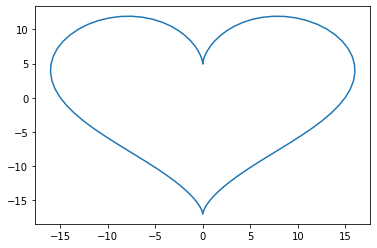

In [34]:
plt.plot(x,y)
plt.show()

Now you can send the result to your favourite tinder date

## 2. The autograd package

The autograd package is what really makes PyTorch different from other algebraic language/libraries such as Matlab or Numpy. Whenever you make operations in PyTorch, it will create a computation graph that can later be used to compute derivatives of the output quantities with respect to the input or other intermediate computation steps. 

The official documentation says: *'torch.autograd provides classes and functions implementing automatic differentiation of arbitrary scalar valued functions. It requires minimal changes to the existing code - you only need to declare Tensor s for which gradients should be computed with the requires_grad=True keyword. '*

### 2.1 A guided tour

Let's see how autograd may be used to compute the derivative of an analytical function.

In [35]:
def f(x):
    return x**2 + 3*x - 2*torch.sin(x/5)

In [36]:
def hand_df(x):
    return 2*x + 3 - 2/5*torch.cos(x/5)

In [37]:
x = torch.randn(1, requires_grad=True)
y = f(x)
df = torch.autograd.grad(y, x)

x, y, df, hand_df(x)

(tensor([1.5519], requires_grad=True),
 tensor([6.4530], grad_fn=<SubBackward0>),
 (tensor([5.7228]),),
 tensor([5.7228], grad_fn=<SubBackward0>))

You see how autograd is able to compute the gradient of scalar values with respecto to a vector automatically for you. We can exploit this for example to perform least squares curve fitting with a simple parametric model:

In [48]:
def unknown_function(x):
    return (5*x + 3*x**2)*(x - 1)/2 + 3

# generate some data
x = torch.arange(-3, 3, .1)
y = unknown_function(x)

In [49]:
# We define a parametric model
def parametric_function(w, x):
    x = x.unsqueeze(1)
    return torch.cat((torch.ones_like(x), x, x**2, x**3), 1) @ w

# random initalization of the parameters
param = torch.randn(4, requires_grad=True)

Let's take a look at what happens before training

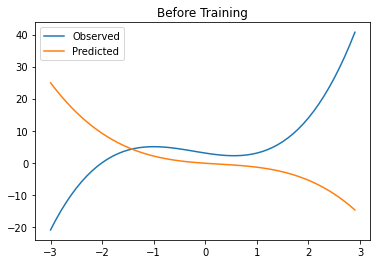

In [40]:
plt.figure()
plt.title('Before Training')
plt.plot(x, y, label='Observed')
plt.plot(x, parametric_function(param, x).detach(), label='Predicted')
plt.legend()

We perform gradient descent on the mean squared error loss function in order to fit the observed curve.
Note how the torch.autograd.grad function gives us automatically access to the gradients which we then use during the optimization step. For more information about autograd you can check this short [tutorial](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html) and the [documentation](https://pytorch.org/docs/stable/autograd.html).

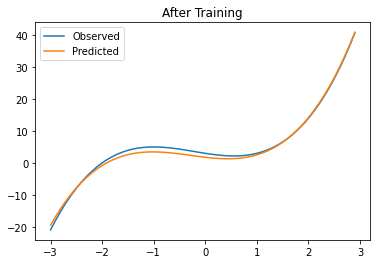

In [41]:
lr = .001
for i in range(1000):
    y_pred = parametric_function(param, x)
    mse = ((y - y_pred)**2).mean()
    grad = torch.autograd.grad(mse, param)[0]
    param = param - lr * grad
plt.figure()
plt.title('After Training')
plt.plot(x, y, label='Observed')
plt.plot(x, parametric_function(param, x).detach(), label='Predicted')
plt.legend()

Storing the gradient values into new variables can quickly become cumbersome, fortunately PyTorch developers found a solution to this, PyTorch **accumulates** the gradient values directly into the corresponding tensor (in the 'grad' property). To use this option you have to use the backward function on the quantity of interest and it will compute the gradient of this quantity with respect to each tensor that has the 'requires_grad' flag set to True. Later on in this notebook we will see how this, together with Optimizer objects, makes gradient descent very simple.

In [42]:
x = torch.randn(10)
w = torch.arange(10).float()
w.requires_grad = True
y = x.T @ w # Simple linear function
y.backward()

x, w, w.grad

(tensor([-1.7836,  0.2024,  1.8807,  0.5025, -1.1215,  0.6411, -0.1080, -0.6692,
         -0.0155, -1.2082]),
 tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], requires_grad=True),
 tensor([-1.7836,  0.2024,  1.8807,  0.5025, -1.1215,  0.6411, -0.1080, -0.6692,
         -0.0155, -1.2082]))

### 2.2 You practice!

Now we would like to perform the same kind of curve fitting that we did a few cells above, but this time we want to use the backward method instead of torch.autograd.grad(). Remember that PyTorch will keep accumulating the gradient values in the `.grad` property of each tensor. To deal with this you can reset the values of the gradients to 0 with the [`.zero_()`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.zero_) method. To make your life easier, you can start from the learning loop two cells above, be careful to reset the parameters before training and to not use the `torch.autograd.grad` function.

<span style="color:red; font-style:italic">Your code comes below</span>

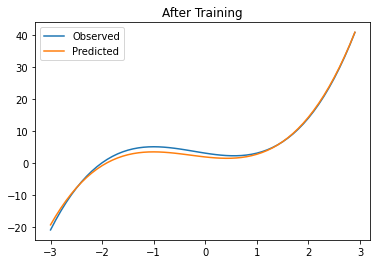

In [51]:
lr = .001
param = torch.randn(4, requires_grad=True)
for i in range(1000):
    y_pred = parametric_function(param, x)
    mse = ((y - y_pred)**2).mean()
    mse.backward()
    with torch.no_grad():
        param.sub_(param.grad*lr)
    param.grad.zero_()    
    
plt.figure()
plt.title('After Training')
plt.plot(x, y, label='Observed')
plt.plot(x, parametric_function(param, x).detach(), label='Predicted')
plt.legend()

## 3. The `torch.nn` and `torch.optim` packages

You should now be able to define your own neural network and train it with tensorial operations and the autograd package. However this would require you to explicitely define every operation in the neural network and to keep track of all the parameters for performing gradient descent. Fortunately, PyTorch provides the `torch.nn` and `torch.optim` packages which implement everything you need to define and train a neural network efficiently.

In [52]:
# Importing both packages
import torch.nn as nn
import torch.optim as optim

### 3.1 A guided tour

**`nn.Functional`**

The `nn` module implements many predefined functions which should simplify your life for building your own neural networks, the complete list can be accessed [here](https://pytorch.org/docs/stable/nn.functional.html). 

Let's play with some of them, below we see some commonly used functions:

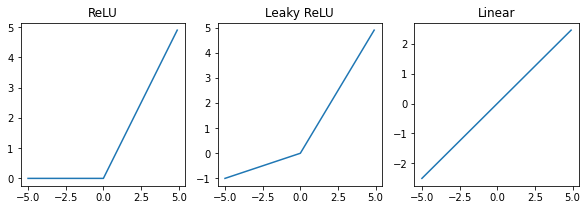

In [53]:
x = torch.arange(-5, 5, .1)

plt.figure(figsize=(10, 3))
y1 = nn.functional.relu(x)
plt.subplot(1, 3, 1)
plt.title('ReLU')
plt.plot(x, y1)

y2 = nn.functional.leaky_relu(x, negative_slope=.2)
plt.subplot(1, 3, 2)
plt.title('Leaky ReLU')
plt.plot(x, y2)

y3 = nn.functional.linear(x.unsqueeze(1), weight=torch.tensor([.5]))
plt.subplot(1, 3, 3)
plt.title('Linear')
plt.plot(x, y3)

**`nn.Module`**


PyTorch provides a very important base class named `nn.Module`. This class is used to build complex neural networks. In fact any class which inherits from it will automatically keep track of the parameters of its components (or properties). To define your own `nn.Module` sub-class you only need to implement the `__init__` constructor and the forward function. Let's see an example:

In [54]:
#This means we create a class named "MySimpleParametricModel" which inherits from nn.Module.
class MySimpleParametricModel(nn.Module): 
    # We could add arguments to the constructor however we do not need that here.
    def __init__(self):
        # We need to call the parent's constructor.
        super(MySimpleParametricModel, self).__init__()
        
        # Here we add a property 'w' to the module which is itself a module that implements a linear layer.
        self.w = nn.Linear(in_features=3, out_features=1, bias=True)
        
    def forward(self, x):
        return self.w(x)

We can now instantiate an object of the `MySimpleParametricModel` class and have a look at its parameters!

In [55]:
model = MySimpleParametricModel()
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[0.1144, 0.4814, 0.3575]], requires_grad=True)
Parameter containing:
tensor([0.1289], requires_grad=True)


You can see that by inheritance from the `nn.Module` class, the parameters of any module used as a property of an object from the class `MySimpleParametricModel` is now accessible as a parameter of this object.
The `nn.Module` implements other useful instructions such as user-friendly printing of the module which summarize the modules contained in it:

In [56]:
print(model)

MySimpleParametricModel(
  (w): Linear(in_features=3, out_features=1, bias=True)
)


PyTorch already implements many `nn.modules` that are often used as neural networks components such as convolutions, activations and linear layers.
For example let's imagine we want to build a simple 3 layers MLP:

In [57]:
class MySimpleMLP(nn.Module):
    def __init__(self, in_size, hidden_units, out_size):
        super(MySimpleMLP, self).__init__()
        
        # Let us now define the linear layers we need:
        self.fc1 = nn.Linear(in_size, hidden_units)
        self.fc2 = nn.Linear(hidden_units, hidden_units)
        self.fc3 = nn.Linear(hidden_units, out_size)
        
    # We have also to define what is the forward of this module:
    def forward(self, x):
        h1 = nn.functional.relu(self.fc1(x))
        h2 = nn.functional.relu(self.fc2(h1))
        out = self.fc3(h2)
        return out

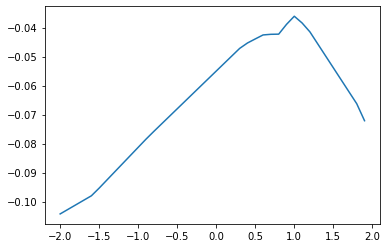

In [58]:
# Instantiate a 3 layers MLP (with 10 hidden neurons in each layer) that computes a scalar quantity from a scalar input.
my_net = MySimpleMLP(1, 10, 1)

# We usually give batches of values to nn modules, where the first dimension is the dimension of the batch while 
#the others must represent your data (here a scalar).
x = torch.arange(-2, 2, .1).unsqueeze(1) 

# Detach is used to detach the tensor from its computation graph, it is required to 
#be able to convert the tensor as numpy matrix (which is implicitely made when you plot a tensor).
y = my_net(x).detach() 
plt.plot(x, y)

**`nn.Sequential`**

Writing the forward pass can become inconvenient and dirty if you want to add a multiple number of layers, for that you can use the `nn.Sequential` module which automatically chains modules with each others.

In [59]:
class MyElegantSimpleMLP(nn.Module):
    def __init__(self, in_size, hidden_units, out_size):
        super(MyElegantSimpleMLP, self).__init__()
        
        self.net = nn.Sequential(nn.Linear(in_size, hidden_units), nn.ReLU(),
                                nn.Linear(hidden_units, hidden_units), nn.ReLU(),
                                nn.Linear(hidden_units, out_size))
        
    # We have also to define what is the forward of this module:
    def forward(self, x):
        out = self.net(x)
        return out

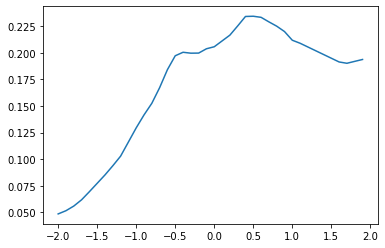

In [60]:
# Instantiate a 3 layers MLP (with 30 hidden neurons in each layer) 
# that computes scalar quantity from scalar input.
my_net = MyElegantSimpleMLP(1, 30, 1)

x = torch.arange(-2, 2, .1).unsqueeze(1) 
y = my_net(x).detach() 

plt.plot(x, y)

**Optimizer**

You should now be able to define any kind of neural network you like. However if you want to optimize it you would still need to iterate through all the parameters of the net thanks to the `.parameters()` iterator. In principle you could do that to update the values accordingly to their gradient and to your update rule, however this would require some code and would be prone to bugs. Instead, the `nn.Optimizer` implements classes that handle that for you!
For example let's say you would like to learn the function $y := f(x) = x^2$ with a neural network with mean squared error and stochastic gradient descent:

In [61]:
# We create an object from the class SGD that will make the updates for us.
sgd_optimizer = optim.SGD(params=my_net.parameters(), lr=.001)

# Let's do some learning steps with randomly generated x values:
for i in range(5000):
    x = torch.randn(100, 1)
    y = x**2
    y_pred = my_net(x)
    
    # We have to set all the grad values of the parameters of our net to zero, we can use zero_grad instruction
    sgd_optimizer.zero_grad()
    
    # Let's compute the loss and the gradients with respect to it.
    loss = ((y - y_pred)**2).mean()
    loss.backward()
    
    # And now we update the parameters:
    sgd_optimizer.step()

Let's check the result:

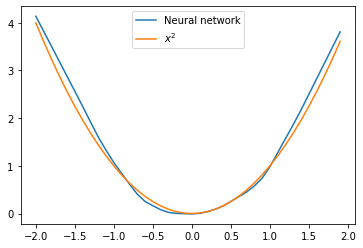

In [62]:
x = torch.arange(-2, 2, .1).unsqueeze(1) 

y = my_net(x).detach() 
plt.plot(x, y, label='Neural network')
plt.plot(x, x**2, label='$x^2$')
plt.legend()

This is not perfect but we can see that the network learned to model something that looks like a quadratic function.

### Training our first neural network classifier

We now have all the necessary knowledge to build and train our very first neural network on a simple binary classification task. To do this we will start by importing a toy example dataset from the sklearn library, and then create and use the resulting splits for training.

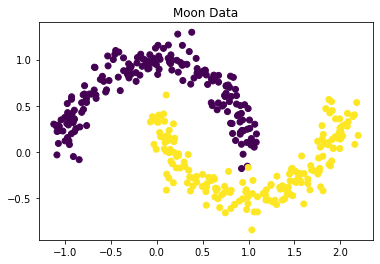

In [63]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import numpy as np

X, Y = make_moons(500, noise=0.1) # create artificial data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=73) # create splits

plt.scatter(X_train[:,0], X_train[:,1], c=Y_train) # visualize the data
plt.title('Moon Data')
plt.show()

When we train a neural network in PyTorch, no matter how complex the model is, we always go through a training loop. In this loop we feed the data to the model and get its predictions. We then compare the predictions of the network to the ground truth and adjust the parameters of the model by performing gradient descent. We have already seen all the components that are necessary for going through this process, so the only thing that remains to be done is to put all the pieces of this notebook together and train our **first awesome neural network!**

During the training stage we would like to keep track whether our model will improve over the different iterations. It is therefore good practice to monitor whether the loss we are minimizing decreases over time, and whether the overall performance of the model increases the more training iterations we perform. Remember that one of the key components of Deep Learning are tensors, and we might not always have the data coming in this specific format. It is therefore necessary to convert it if needed.

Once the data is in an appropriate format it can be given to the model, and we can obtain its predictions. This is what we usually call the **forward pass**. Once we obtain our predictions, we can compare how close they are to what we would like the network to predict: to do this we feed our predictions together with the true labels through the loss function which are minimizing. At its early training stages the network will very likely perform poorly: we can improve its performance by adjusting its weights by gradient descent. We can do this very easily by obtaining the gradients of the parameters with respect to the loss function we are minimizing (**backward pass**) and adjusting these weights with the optimizer we defined previously.

Once all of this is done we can measure the performance of our model, which in this case will be reflected by its accuracy in classifying the synthetic dataset we created beforehand. 

In [64]:
net = nn.Sequential(nn.Linear(2, 50), nn.ReLU(),
                   nn.Linear(50, 50), nn.ReLU(),
                   nn.Linear(50, 1), nn.Sigmoid())
optimizer = optim.Adam(net.parameters(), lr=.01)

In [65]:
def loss_func(y_hat, y):
    return nn.BCELoss()(y_hat, y)

In [66]:
train_loss = [] # where we keep track of the loss
train_accuracy = [] # where we keep track of the accuracy of the model
iters = 1000 # number of training iterations

Y_train_t = torch.FloatTensor(Y_train).reshape(-1, 1) # re-arrange the data to an appropriate tensor

for i in range(iters):
    X_train_t = torch.FloatTensor(X_train)
    y_hat = net(X_train_t) # forward pass
    
    loss = loss_func(y_hat, Y_train_t) # compute the loss
    loss.backward() # obtain the gradients with respect to the loss
    optimizer.step() # perform one step of gradient descent
    optimizer.zero_grad() # reset the gradients to 0
    
    y_hat_class = np.where(y_hat.detach().numpy()<0.5, 0, 1) # we assign an appropriate label based on the network's prediction
    accuracy = np.sum(Y_train.reshape(-1,1)==y_hat_class) / len(Y_train) # compute final accuracy
    
    train_accuracy.append(accuracy)
    train_loss.append(loss.item())

Text(0, 0.5, 'Accuracy')

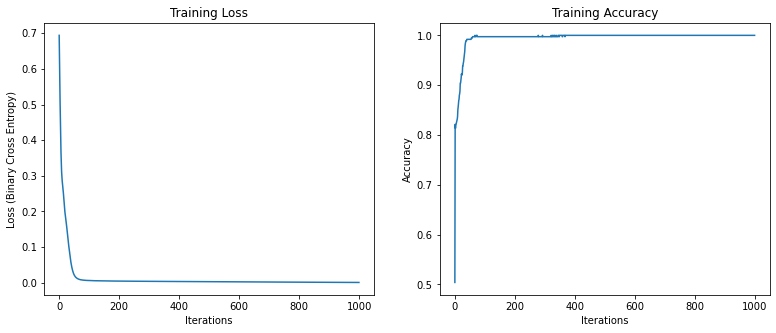

In [67]:
plt.figure(figsize=(13, 5))
plt.subplot(1, 2, 1)
plt.title('Training Loss')
plt.plot(train_loss)
plt.xlabel('Iterations')
plt.ylabel('Loss (Binary Cross Entropy)')

plt.subplot(1, 2, 2)
plt.title('Training Accuracy')
plt.plot(train_accuracy)
plt.xlabel('Iterations')
plt.ylabel('Accuracy')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x120f9210ac0>)

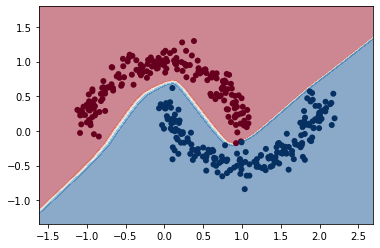

In [68]:
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)

    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - .5, X[:,0].max() + .5
    ymin, ymax = X[:,1].min() - .5, X[:,1].max() + .5
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    with torch.no_grad():
        labels = model(torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]))

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)

    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels = model(torch.FloatTensor(X))
    ax.scatter(X[:,0], X[:,1], c=y.ravel(), cmap=cmap, lw=0)

    return fig, ax

plot_decision_boundary(X_train,Y_train, net, cmap = 'RdBu')